### Import required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Preprocessing Tools

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

### Import Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

### Import Evaluation Metrics

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load Dataset

In [7]:
# Load train data
# Reads training data with custom separator, assigns column names.
train_df = pd.read_csv("C:/Users/Rutvik/OneDrive/Desktop/CODESOFT INTERNSHIP TASK/CODESOFT_Task1_Movie_Genre_Classification/Movie Genre CLassification Dataset/train_data.txt", sep=' ::: ', engine='python', names=["id", "title", "genre", "description"])

# Load test data
# Reads test dataset without genre labels.
test_df = pd.read_csv("C:/Users/Rutvik/OneDrive/Desktop/CODESOFT INTERNSHIP TASK/CODESOFT_Task1_Movie_Genre_Classification/Movie Genre CLassification Dataset/test_data.txt", sep=' ::: ', engine='python', names=["id", "title", "description"])

# Load test labels (solution)
# Reads actual genres for test dataset.
test_solution_df = pd.read_csv("C:/Users/Rutvik/OneDrive/Desktop/CODESOFT INTERNSHIP TASK/CODESOFT_Task1_Movie_Genre_Classification/Movie Genre CLassification Dataset/test_data_solution.txt", sep=' ::: ', engine='python', names=["id", "title", "genre", "description"])


### Data Cleaning

In [8]:
# Drop missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
test_solution_df.dropna(inplace=True)

### Label Encoding

In [9]:
# Encode genre labels
label_encoder = LabelEncoder()
train_df['genre_encoded'] = label_encoder.fit_transform(train_df['genre'])
test_solution_df['genre_encoded'] = label_encoder.transform(test_solution_df['genre'])

### Feature Extraction

In [10]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [11]:
# Fit on training description and transform both train and test
X_train = vectorizer.fit_transform(train_df['description'])
y_train = train_df['genre_encoded']

In [12]:
X_test = vectorizer.transform(test_df['description'])
y_test = test_solution_df['genre_encoded']

### Model Training and Evaluation

##### Logistic Regression

In [13]:
#Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
#Predict with Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

In [15]:
#Accuracy and Classification Report for Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("=== Logistic Regression Model ===")
print("\nLogistic Regression Accuracy : ", logreg_accuracy)
print("\nClassification Report :\n", classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_))

=== Logistic Regression Model ===

Logistic Regression Accuracy :  0.5840774907749078

Classification Report :
               precision    recall  f1-score   support

      action       0.48      0.29      0.36      1314
       adult       0.60      0.24      0.34       590
   adventure       0.59      0.17      0.26       775
   animation       0.53      0.07      0.12       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.58      0.55      7446
       crime       0.38      0.05      0.08       505
 documentary       0.67      0.85      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.49      0.09      0.15       783
     fantasy       0.56      0.06      0.10       322
   game-show       0.89      0.51      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.64      0.57      0.60      2204
       music       0.67      0.45      0.54       731
     musical       0.33

c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [16]:
#Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

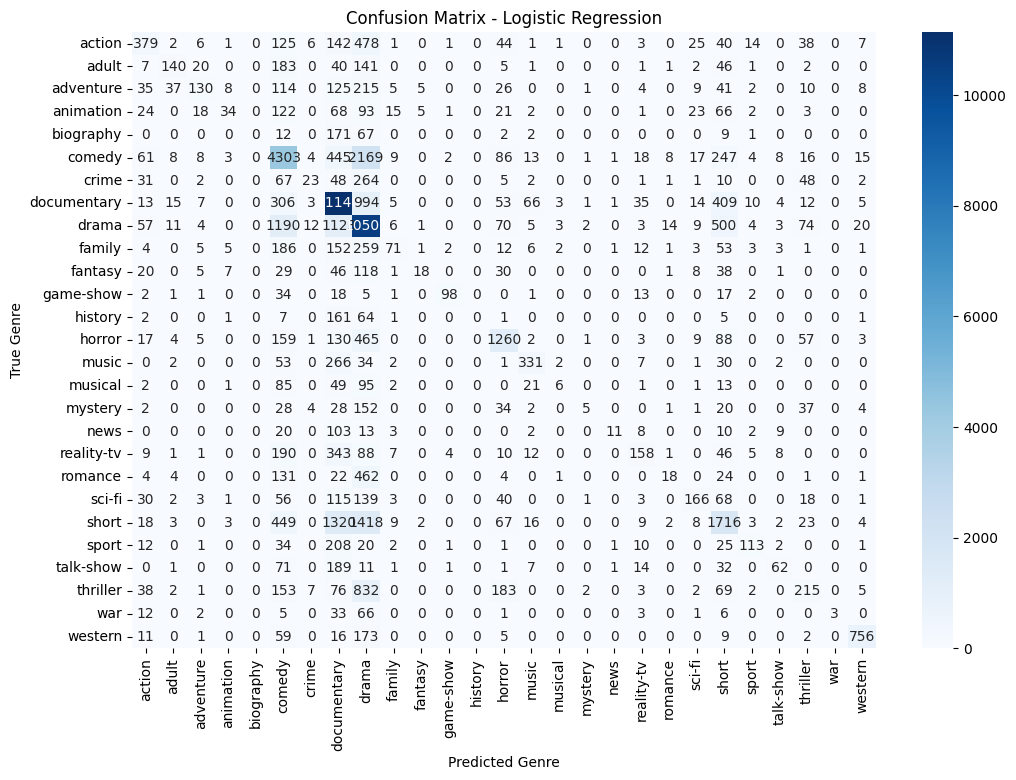

In [17]:
#Heatmap for logistic regression confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.show()

##### Naive Bayes

In [18]:
#Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [19]:
#Predict with Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [20]:
#Accuracy and Classification Report for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("=== Naive Bayes Model ===")
print("\nNaive Bayes Accuracy : ", nb_accuracy)
print("\nClassification Report :\n", classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

=== Naive Bayes Model ===

Naive Bayes Accuracy :  0.5238560885608856

Classification Report :
               precision    recall  f1-score   support

      action       0.55      0.11      0.18      1314
       adult       0.51      0.06      0.11       590
   adventure       0.81      0.07      0.13       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.51      0.42      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.87      0.69     13096
       drama       0.46      0.82      0.59     13612
      family       0.50      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.32      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.69      0.36      0.47      2204
       music       0.74      0.15      0.25       731
     musical       0.00      0.00      

c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rutvik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [21]:
#Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

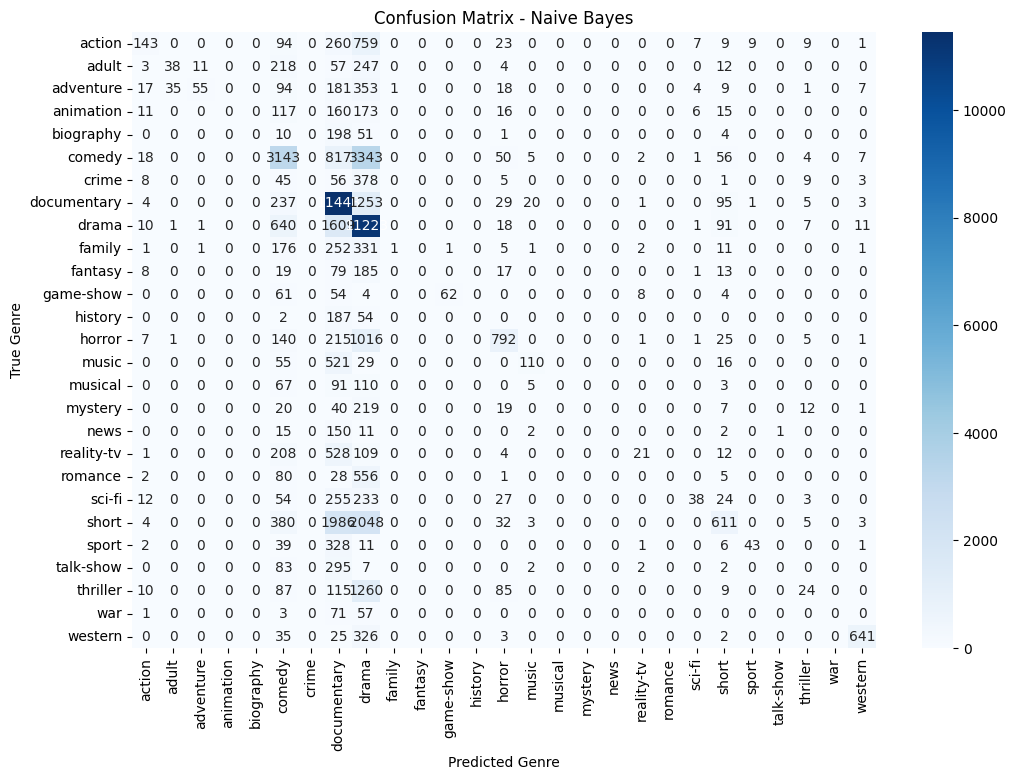

In [22]:
#Heatmap for Naive Bayes confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.show()

##### Support Vector Machine (SVM)

In [23]:
#Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [24]:
#Predict with SVM
y_pred_svm = svm_model.predict(X_test)

In [25]:
#Accuracy and Classification Report for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("=== SVM Model ===")
print("\nSVM Accuracy: ", svm_accuracy)
print("\nClassification Report :\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

=== SVM Model ===

SVM Accuracy:  0.5711992619926199

Classification Report :
               precision    recall  f1-score   support

      action       0.38      0.31      0.34      1314
       adult       0.51      0.36      0.43       590
   adventure       0.38      0.20      0.26       775
   animation       0.30      0.14      0.19       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.55      0.54      7446
       crime       0.18      0.06      0.09       505
 documentary       0.69      0.82      0.75     13096
       drama       0.56      0.71      0.63     13612
      family       0.31      0.13      0.18       783
     fantasy       0.27      0.11      0.15       322
   game-show       0.74      0.60      0.66       193
     history       0.17      0.02      0.04       243
      horror       0.58      0.60      0.59      2204
       music       0.58      0.49      0.53       731
     musical       0.28      0.08      0.12       276
  

In [26]:
#Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

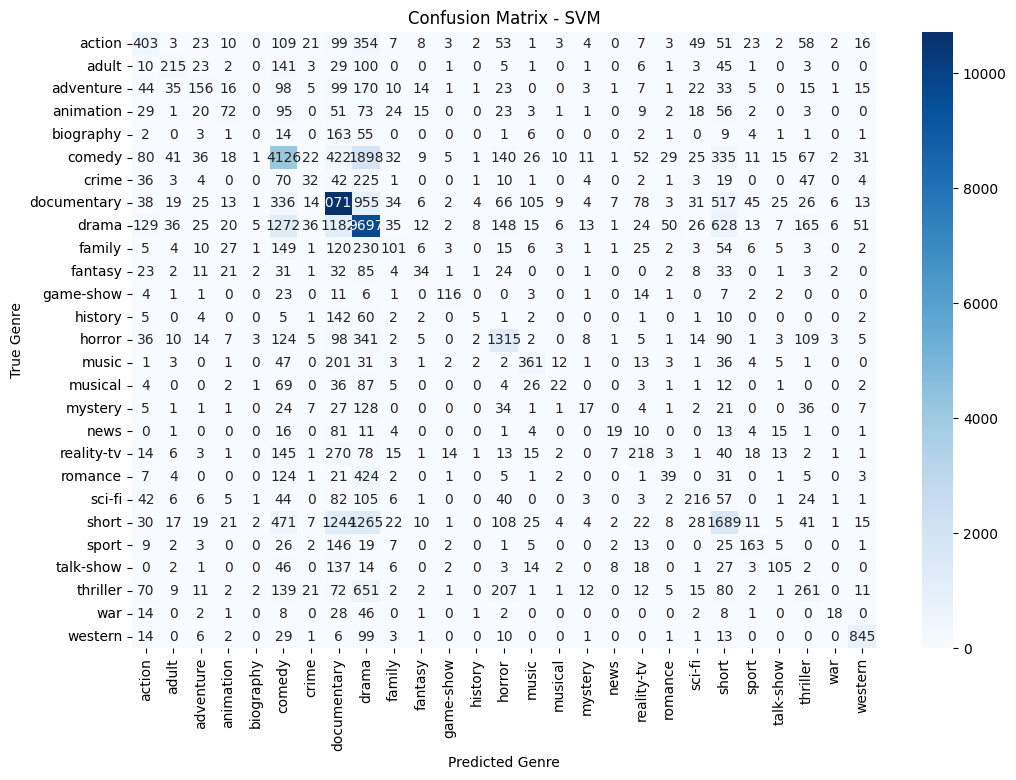

In [27]:
#Heatmap for SVM confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.show()

### Best Model Selection

In [28]:
# Store accuracies in a dictionary for comparison
accuracies = {
    "Logistic Regression": logreg_accuracy,
    "Naive Bayes": nb_accuracy,
    "SVM": svm_accuracy
}

In [29]:
# Find the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

In [30]:
# Print the best model and its accuracy
print(f"Best Model: {best_model_name} with Accuracy = {best_model_accuracy}")

Best Model: Logistic Regression with Accuracy = 0.5840774907749078
